In [160]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [161]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [162]:
LONG_FACTOR_CANDIDATES = [
    "VLUE", # Value.
#     "USMV", # Low volatility.
#     "SDY", # Dividend.
    "VXX",
]
SHORT_FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
]
LONG_CANDIDATES = [ 
    "IBUY", # Ecommerce is growing.
    "ESPO", # Online gaming.
    "LIT", # For lithium ion batteries.
    "MCHI",
    
    "AMZN",
    "BLK",
    "BABA",
    "DDOG",
    "FDX",
    "FIVN",
    "NVDA",
    "PBW",
    "PINS",
    "PTON",
    "SNAP",
    "SE",
    "SQ",
    "TTD",
    "TWLO",
    "TSLA",
    "UPS",
    "ZG",
    "SHOP",
    "UBER",
    "ARKK",
# #     "SNOW" # Not enough data yet.
# #     "U" # Not enough data yet.
] + LONG_FACTOR_CANDIDATES
SHORT_CANDIDATES = [
    "VRSN",
    "CSCO",
    "IBM",
    "BOX",
    "CLDR",
    "EQR",
    "NEWR",
    "VMW",
    "GDDY",
#     "RXT" # Rackspace. Not enough data yet.
    # Uber will outperform lyft because it's in the deliveries instead of transportations business.
    "LYFT", 
    "PS", # Who takes pluralsight training??
    "GRPN",
    
    "WIFI", # Future is not wifi hotspots. It's cellular.
    "T", # AT&T is becoming a utility.
    "VZ", # Verizon is becoming a utility.
    "VG", # Old school VOIP.
    "YELP",
    "DISH", # Satellite TV is dying.
    "SIRI", # Spotify/Apple Music taking over.
    
    "GUNR", # Natural resources.
    "MJ", # Weed stuff.
    
#     "APPS", # Pre-installed android crapware. But I don't know the business model.
] + SHORT_FACTOR_CANDIDATES


r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

[*********************100%***********************]  52 of 52 completed


In [163]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=IBUY,ESPO,LIT,MCHI,AMZN,BLK,BABA,DDOG,FDX,FIVN,NVDA,PBW,PINS,PTON,SNAP,SE,SQ,TTD,TWLO,TSLA,UPS,ZG,SHOP,UBER,ARKK,VLUE,VXX

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=VRSN,CSCO,IBM,BOX,CLDR,EQR,NEWR,VMW,GDDY,LYFT,PS,GRPN,WIFI,T,VZ,VG,YELP,DISH,SIRI,GUNR,MJ,SPY,IWF,IWM,MTUM


In [164]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

# Proposed Allocation

## Sorted A-Z

In [165]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

## Sorted by weight

In [166]:
print(data[data!=0].sort_values())

MTUM   -0.132849
IWF    -0.119045
SPY    -0.090111
VRSN   -0.080777
GUNR   -0.071361
IWM    -0.068318
VZ     -0.056604
GDDY   -0.054017
T      -0.045946
VMW    -0.044745
PS     -0.042241
CLDR   -0.040668
SIRI   -0.035142
EQR    -0.034625
BOX    -0.033735
CSCO   -0.029389
VG     -0.026926
YELP   -0.024049
WIFI   -0.018109
MJ     -0.010679
DISH   -0.003601
GRPN   -0.002939
LYFT   -0.002877
IBM    -0.000911
SE      0.000331
SQ      0.001945
VXX     0.005174
SHOP    0.005629
PINS    0.009500
TTD     0.009686
TWLO    0.013515
ZG      0.014653
MCHI    0.019579
DDOG    0.020882
PBW     0.029534
SNAP    0.034459
FIVN    0.038164
ARKK    0.044331
LIT     0.046173
IBUY    0.047208
NVDA    0.052382
UBER    0.059936
FDX     0.061985
UPS     0.063123
ESPO    0.063620
AMZN    0.075272
BLK     0.097355
VLUE    0.185562
Name: 2020-10-30 00:00:00, dtype: float64


Start date,2020-02-03
End date,2020-10-30
Total months,9
,Backtest
Annual return,136.655%
Cumulative returns,91.457%
Annual volatility,10.644%
Sharpe ratio,8.16
Calmar ratio,48.53
Stability,0.98
Max drawdown,-2.816%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.82,2020-03-30,2020-04-09,2020-04-16,14
1,1.81,2020-03-18,2020-03-19,2020-03-23,4
2,1.64,2020-10-07,2020-10-12,2020-10-14,6
3,1.25,2020-04-22,2020-05-01,2020-05-06,11
4,1.08,2020-03-03,2020-03-04,2020-03-05,3


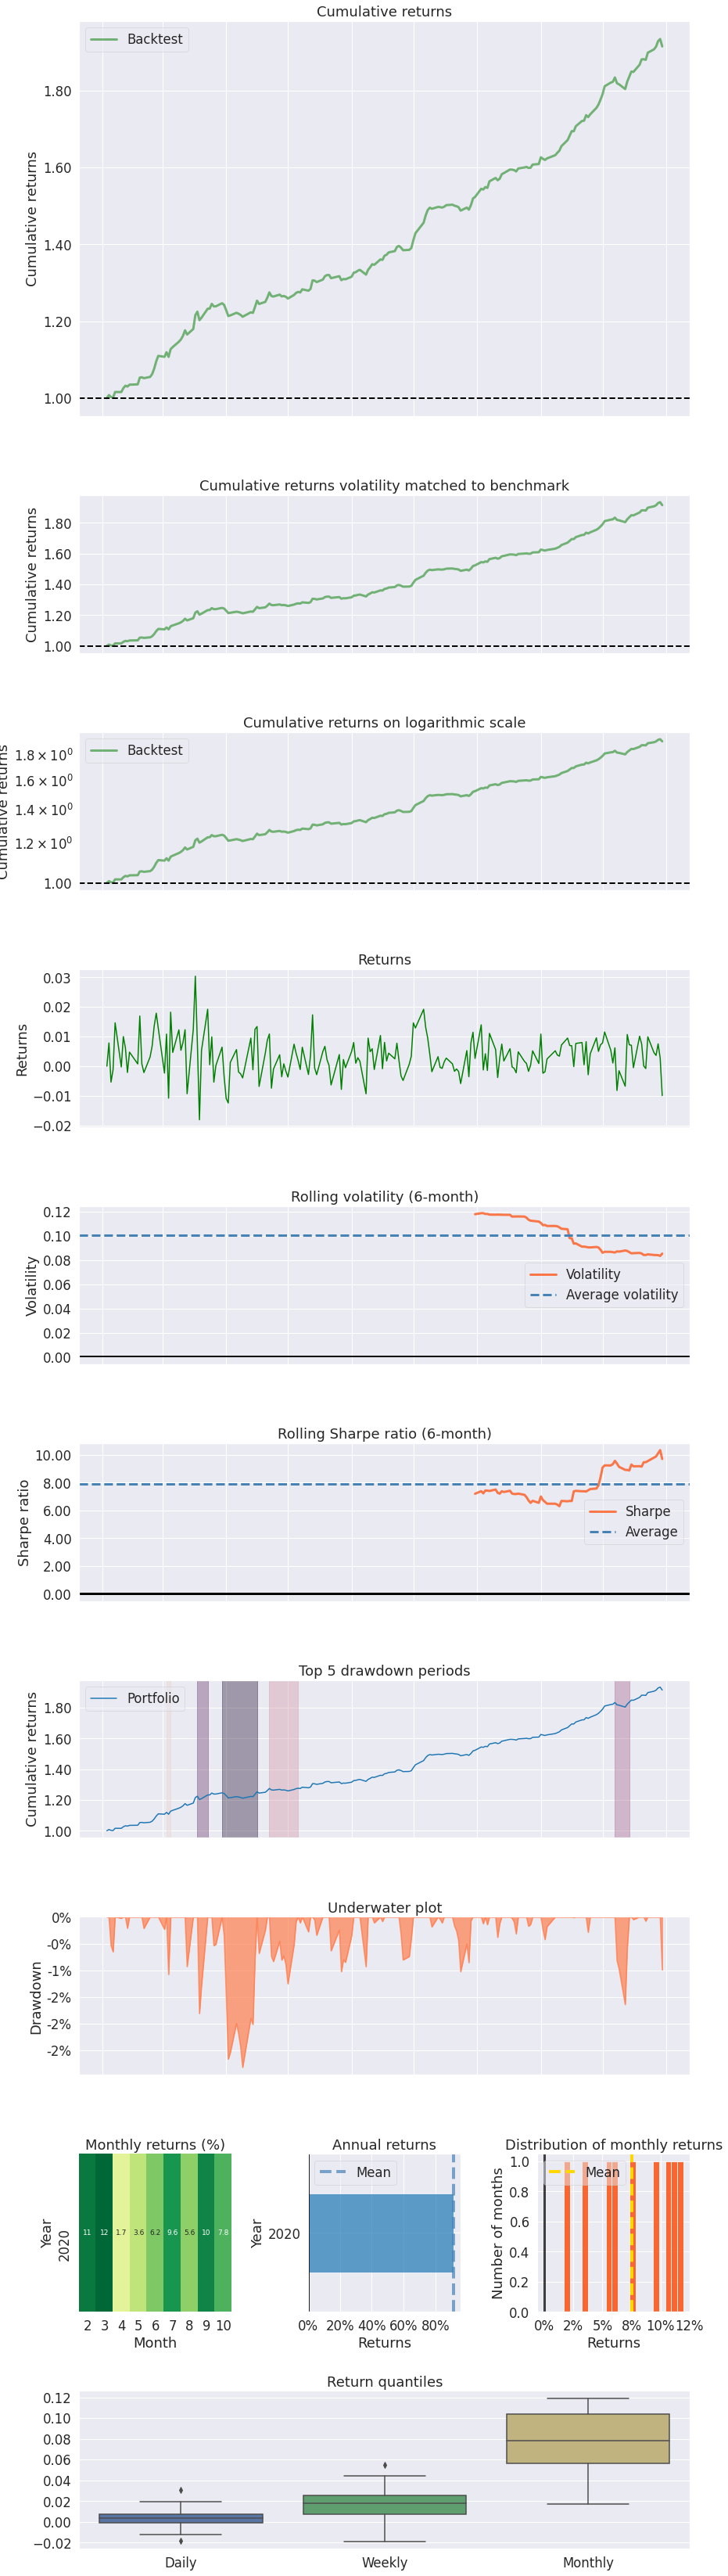

In [167]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [168]:
if True:
    r.save_most_recent_allocation("./allocations/", leverage=1.8)